In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import sys
import scipy.ndimage
import matplotlib.cm
import imageio

In [2]:
sys.path.append('../../Preprocess/')
import CalcParaMaps
import BiasCorrection

In [3]:
frames = {}
cbfs = {}
cbvs = {}
mtts = {}
ttps = {}
N0 = 200000
imgNorm = 0.15
iTest = 55

In [44]:
# read references
with np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/paras_tikh_0.3.npz') as f:
    mask = f['mask'][[iTest], ...]
    cbfFac = f['cbfFac']
    cbvFac = f['cbvFac']
aif = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/aif0.npy') / 1000 / imgNorm
ref = (np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/imgs_-1.npy')[[iTest], ...] - 1) / imgNorm
img = (np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/data/imgs_%g.npy'%N0)[[iTest], ...] - 1) / imgNorm

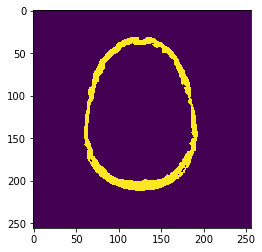

In [46]:
mask = np.where(ref[0, ..., 0] * imgNorm > 0.12, 1,0)
plt.imshow(mask)

In [38]:
# vessel mask from img
maskVessels = np.where(np.max(img, -1) > 0.1 / imgNorm, 1, 0)
maskVessels *= mask
for i in range(maskVessels.shape[0]):
    maskVessels[i,...] = scipy.ndimage.morphology.binary_dilation(maskVessels[i,...])
mask *= (1-maskVessels)

img *= mask[...,np.newaxis]
ref *= mask[...,np.newaxis]
ctp = img - (img[...,[0]] + img[...,[1]]) / 2

In [39]:
def GetResults(ctp, aif, mask, cbfFac, cbvFac, iFrame = 20):
    cbf, cbv, mtt = CalcParaMaps.CalcParaMaps(ctp, mask[...,np.newaxis], kappa = 1, rho = 1, aif = np.copy(aif), directCBV = False)
    cbf *= cbfFac
    cbv *= cbvFac
    mtt = mtt / cbfFac * cbvFac
    ttp = np.argmax(ctp, -1)
    
    mask = mask[0,32:-32,32:-32]
    
    return ctp[0, 32:-32, 32:-32, iFrame] * mask, cbf[0, 32:-32, 32:-32] * mask, cbv[0, 32:-32, 32:-32] * mask, mtt[0, 32:-32, 32:-32] * mask, ttp[0, 32:-32, 32:-32] * mask

In [11]:
# display color map
# cmap = matplotlib.cm.nipy_spectral
cmap = matplotlib.cm.jet(np.arange(256))
cmap[0, :-1] = 0
# cmapDict = cmap._segmentdata
# cmapDict['green'][-1] = (1.0, 0.0, 0.0)
# cmapDict['blue'][-1] = (1.0, 0.0, 0.0)
newCmap = matplotlib.colors.ListedColormap(cmap, 'perfusion', N=256)

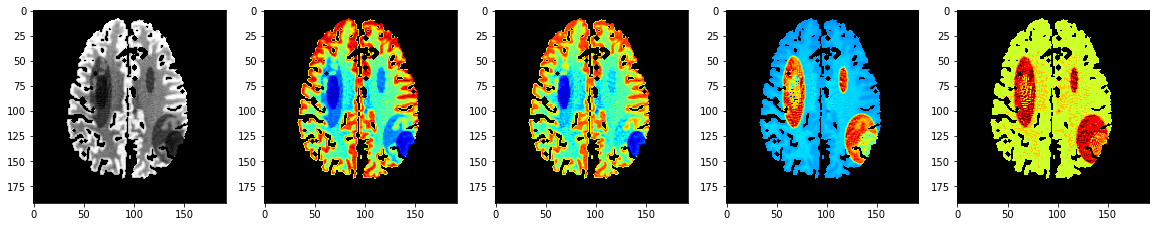

In [24]:
# paramaps for reference
frame, cbf, cbv, mtt, ttp = GetResults(ref - ref[...,[0]], aif, mask, cbfFac, cbvFac)

name = 'ref'
frames[name] = frame
cbfs[name] = cbf
cbvs[name] = cbv
mtts[name] = mtt
ttps[name] = ttp

plt.figure(figsize = [20,4])
plt.subplot(151); plt.imshow(frame, 'gray', vmin=0, vmax=0.1)
plt.subplot(152); plt.imshow(cbf, newCmap, vmin=0, vmax=50)
plt.subplot(153); plt.imshow(cbv, newCmap, vmin=0, vmax=4)
plt.subplot(154); plt.imshow(mtt, newCmap, vmin=3.5, vmax=7)
plt.subplot(155); plt.imshow(ttp, newCmap, vmin=15, vmax=25)

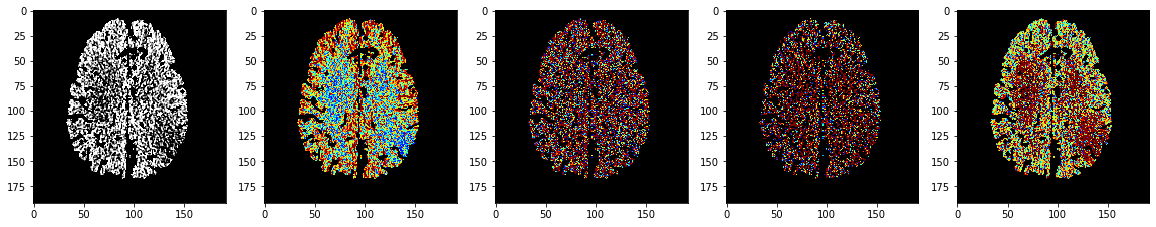

In [25]:
# paramaps for gaussian
gauss = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/gaussian/Gaussian_std_0_N0_%g.npy'%N0)[[0], ...]
frame, cbf, cbv, mtt, ttp = GetResults(gauss, aif, mask, cbfFac, cbvFac)

name = 'raw'
frames[name] = frame
cbfs[name] = cbf
cbvs[name] = cbv
mtts[name] = mtt
ttps[name] = ttp

plt.figure(figsize = [20,4])
plt.subplot(151); plt.imshow(frame, 'gray', vmin=0, vmax=0.1)
plt.subplot(152); plt.imshow(cbf, newCmap, vmin=0, vmax=50)
plt.subplot(153); plt.imshow(cbv, newCmap, vmin=0, vmax=4)
plt.subplot(154); plt.imshow(mtt, newCmap, vmin=3.5, vmax=7)
plt.subplot(155); plt.imshow(ttp, newCmap, vmin=15, vmax=25)

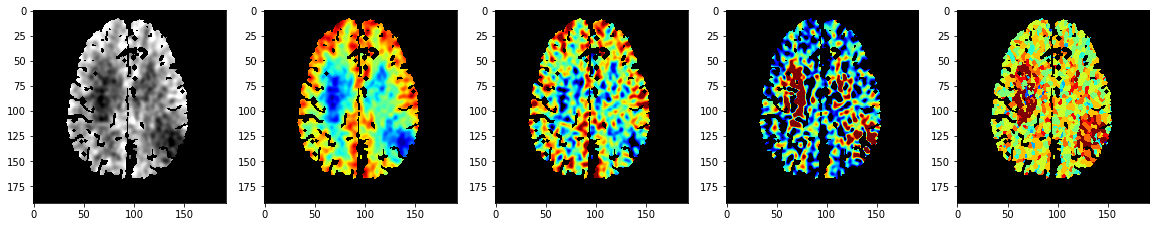

In [26]:
# paramaps for gaussian
gauss = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/gaussian/Gaussian_std_2_N0_%g.npy'%N0)[[0], ...]
frame, cbf, cbv, mtt, ttp = GetResults(gauss, aif, mask, cbfFac, cbvFac)

name = 'gauss'
frames[name] = frame
cbfs[name] = cbf
cbvs[name] = cbv
mtts[name] = mtt
ttps[name] = ttp

plt.figure(figsize = [20,4])
plt.subplot(151); plt.imshow(frame, 'gray', vmin=0, vmax=0.1)
plt.subplot(152); plt.imshow(cbf, newCmap, vmin=0, vmax=50)
plt.subplot(153); plt.imshow(cbv, newCmap, vmin=0, vmax=4)
plt.subplot(154); plt.imshow(mtt, newCmap, vmin=3.5, vmax=7)
plt.subplot(155); plt.imshow(ttp, newCmap, vmin=15, vmax=25)

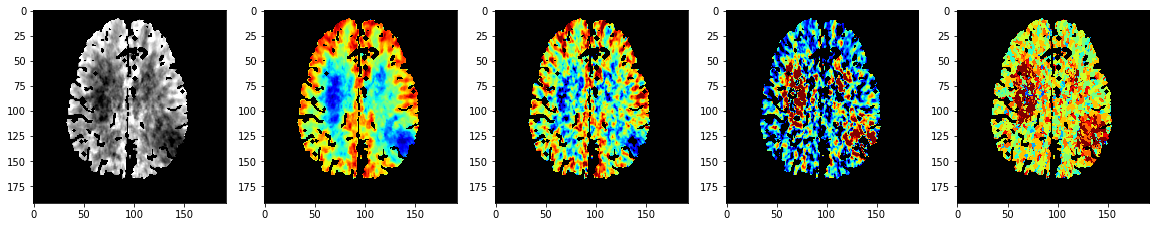

In [27]:
# paramaps for TIPS
tips = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/tips/TIPS_sigma_0.05_2_N0_%g.npz.npy'%N0)[[0], ...]
frame, cbf, cbv, mtt, ttp = GetResults(tips, aif, mask, cbfFac, cbvFac)

name = 'tips'
frames[name] = frame
cbfs[name] = cbf
cbvs[name] = cbv
mtts[name] = mtt
ttps[name] = ttp

plt.figure(figsize = [20,4])
plt.subplot(151); plt.imshow(frame, 'gray', vmin=0, vmax=0.1)
plt.subplot(152); plt.imshow(cbf, newCmap, vmin=0, vmax=50)
plt.subplot(153); plt.imshow(cbv, newCmap, vmin=0, vmax=4)
plt.subplot(154); plt.imshow(mtt, newCmap, vmin=3.5, vmax=7)
plt.subplot(155); plt.imshow(ttp, newCmap, vmin=15, vmax=25)

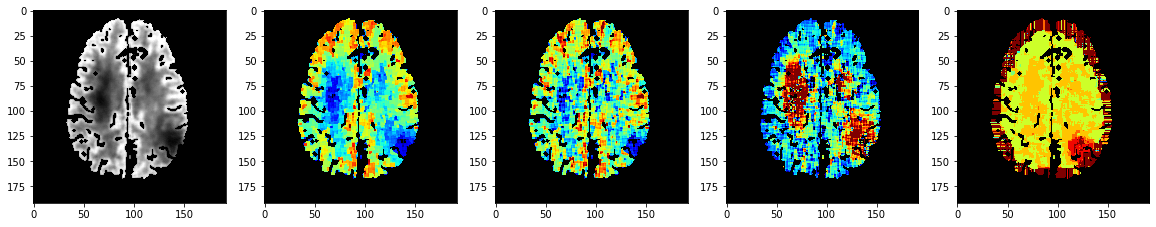

In [36]:
# paramaps for TV
# this is a little different
with np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/tv/TV_beta_5e-4_1e-4_N0_%g.npz'%N0) as f:
    localMask = mask[0, 32:-32, 32:-32]
    cbf = f['cbf'][0, 32:-32, 32:-32] * localMask
    cbv = f['cbv'][0, 32:-32, 32:-32] * localMask * cbvFac
    mtt = f['mtt'][0, 32:-32, 32:-32] * localMask * cbvFac
    ttp = f['ttp'][0, 32:-32, 32:-32] * localMask

name = 'tv'
frames[name] = frame
cbfs[name] = cbf
cbvs[name] = cbv
mtts[name] = mtt
ttps[name] = ttp

plt.figure(figsize = [20,4])
plt.subplot(151); plt.imshow(frame, 'gray', vmin=0, vmax=0.1)
plt.subplot(152); plt.imshow(cbf, newCmap, vmin=0, vmax=50)
plt.subplot(153); plt.imshow(cbv, newCmap, vmin=0, vmax=4)
plt.subplot(154); plt.imshow(mtt, newCmap, vmin=3.5, vmax=7)
plt.subplot(155); plt.imshow(ttp, newCmap, vmin=15, vmax=25)

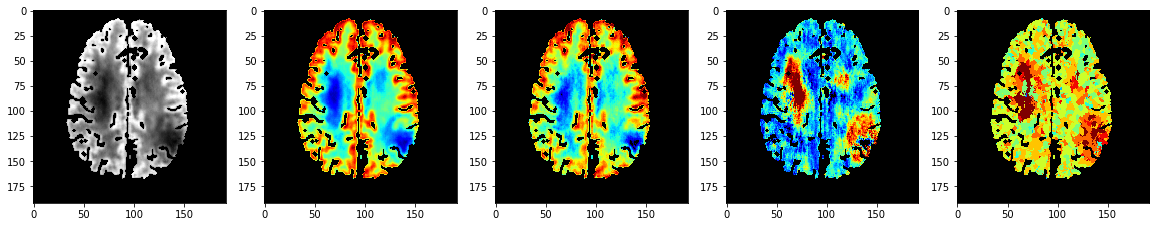

In [40]:
# paramaps for Noise2Noise
n2n = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/beta_12.5_N0_%g/tmp/iodines.npy'%N0)[[iTest], ...].transpose(0, 2, 3, 1) * 0.025 / imgNorm
n2n = BiasCorrection.BiasCorrection(n2n, ctp, mask[...,np.newaxis])
frame, cbf, cbv, mtt, ttp = GetResults(n2n, aif, mask, cbfFac, cbvFac)

name = 'n2n'
frames[name] = frame
cbfs[name] = cbf
cbvs[name] = cbv
mtts[name] = mtt
ttps[name] = ttp

plt.figure(figsize = [20,4])
plt.subplot(151); plt.imshow(frame, 'gray', vmin=0, vmax=0.1)
plt.subplot(152); plt.imshow(cbf, newCmap, vmin=0, vmax=50)
plt.subplot(153); plt.imshow(cbv, newCmap, vmin=0, vmax=4)
plt.subplot(154); plt.imshow(mtt, newCmap, vmin=3.5, vmax=7)
plt.subplot(155); plt.imshow(ttp, newCmap, vmin=15, vmax=25)

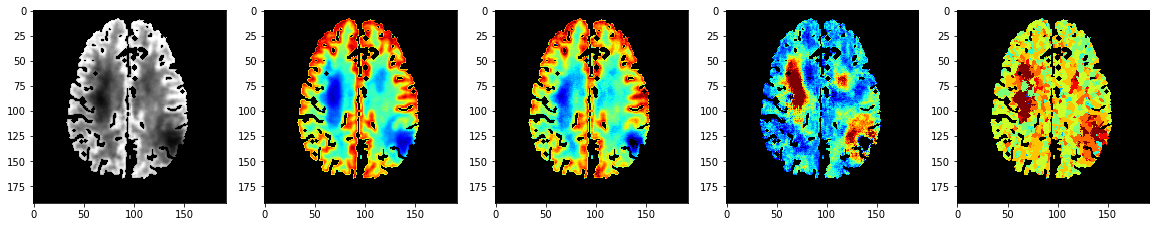

In [30]:
# paramaps for supervised
sup = np.load('/home/dwu/trainData/Noise2Noise/train/ctp/simul/supervised_beta_12.5_N0_%g/tmp/iodines.npy'%N0)[[iTest], ...].transpose(0, 2, 3, 1) * 0.025 / imgNorm
sup = BiasCorrection.BiasCorrection(sup, ctp, mask[...,np.newaxis])
frame, cbf, cbv, mtt, ttp = GetResults(sup, aif, mask, cbfFac, cbvFac)

name = 'sup'
frames[name] = frame
cbfs[name] = cbf
cbvs[name] = cbv
mtts[name] = mtt
ttps[name] = ttp

plt.figure(figsize = [20,4])
plt.subplot(151); plt.imshow(frame, 'gray', vmin=0, vmax=0.1)
plt.subplot(152); plt.imshow(cbf, newCmap, vmin=0, vmax=50)
plt.subplot(153); plt.imshow(cbv, newCmap, vmin=0, vmax=4)
plt.subplot(154); plt.imshow(mtt, newCmap, vmin=3.5, vmax=7)
plt.subplot(155); plt.imshow(ttp, newCmap, vmin=15, vmax=25)

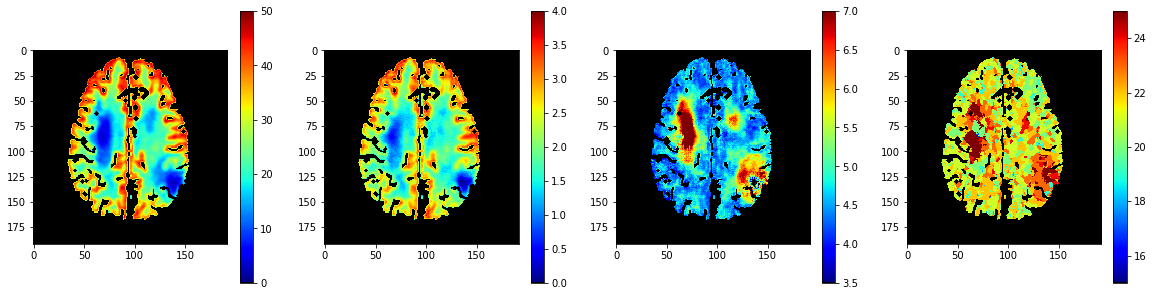

In [19]:
# plot the colorbars
plt.figure(figsize = [20,5])
plt.subplot(141); plt.imshow(cbf, newCmap, vmin=0, vmax=50); plt.colorbar()
plt.subplot(142); plt.imshow(cbv, newCmap, vmin=0, vmax=4); plt.colorbar()
plt.subplot(143); plt.imshow(mtt, newCmap, vmin=3.5, vmax=7); plt.colorbar()
plt.subplot(144); plt.imshow(ttp, newCmap, vmin=15, vmax=25); plt.colorbar()

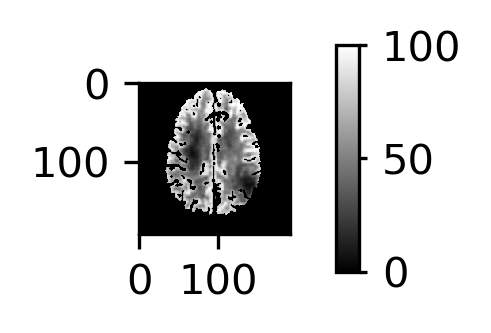

In [39]:
plt.figure(figsize = [1,1], dpi=300)
plt.imshow(frame * 1000, 'gray', vmin=0, vmax=100)
cbar = plt.colorbar(pad = 0.2, aspect=10);
cbar.ax.tick_params(size = 2)
# cbar.set_ticks([4,5,6,7])

In [32]:
# save all the images
outDir = '/home/dwu/trainData/Noise2Noise/train/ctp/results/simul'
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [33]:
def SaveImg(filename, img, cmap, vmin, vmax):
    img = (img - vmin) / (vmax - vmin) * 255
    img[img < 0] = 0
    img[img > 255] = 255
    img = cmap(img.astype(np.uint8)) * 255
    img = img.astype(np.uint8)
    
    if filename is not None:
        imageio.imwrite(filename, img)
        
    return img

In [34]:
for k in frames:
    _ = SaveImg(os.path.join(outDir, k+'_frame.png'), frames[k], matplotlib.cm.gray, 0, 0.1)
    _ = SaveImg(os.path.join(outDir, k+'_cbf.png'), cbfs[k], newCmap, 0, 50)
    _ = SaveImg(os.path.join(outDir, k+'_cbv.png'), cbvs[k], newCmap, 0, 4)
    _ = SaveImg(os.path.join(outDir, k+'_mtt.png'), mtts[k], newCmap, 3.5, 7)
    _ = SaveImg(os.path.join(outDir, k+'_ttp.png'), ttps[k], newCmap, 15, 25)